### Treść zadania

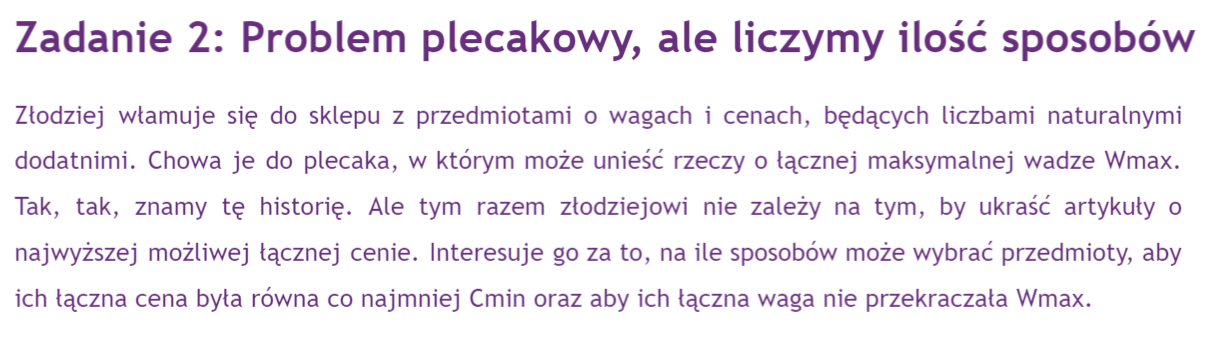

### Omówienie algorytmu

Nieco skomplikowany problem plecakowy. Najlepiej zdefiniować sobie funkcję w taki sposób, w jaki suferuje polecenie, czyli: <br>
$ f(i, w, c) $ - liczba sposobów, na które jesteśmy w stanie wybrać zestaw przedmiotów, wybierając tylko spośród przedmiotów o indeksach $ \{0, 1, ..., i - 1, i \} $, tak aby ich łączna waga nie przekraczała $ w $ oraz sumaryczna cena była nie mniejsza niż $ c $. 
###### Wprowadzenie:
Tak, wiem, nieco skomplikowane. Musimy najpierw sobie przypomnieć, jak działał problem plecakowy. Zauważmy, że w naszym przypadku wspólne z problemem plecakowym jest to, że zawsze wybieramy przedmioty z coraz większych podzbiorów przedmiotów oraz za każdym razem dobieramy tak przedmioty, aby łączna waga nie przekraczała $ w $. Pozostaje jeszcze uzależnić jakoś nasze rozwiązanie od ceny. Dla zdefiniowanej w powyższy sposób funkcji, tablica, w której będziemy dynamicznie zapamiętywać rozwiązania, będzie miała 3 wymiary (można poradzić sobie na 2, co pokazałem w następnym rozwiązaniu niżej): $ n \times Wmax \times Cmin $, tak więc komórka $ F[i][w][c] $ będzie zawierała liczbę sposobów uzyskania zawartości plecaka takiej, że jej łączna waga nie przekracza $ w $, cena jest nie mniejsza niż $ c $ i bierzemy tylko przedmioty spośród tych o indeksach $ {0, 1, ..., i - 1, i} $.
###### Od czego zaczynamy?
Podobnie jak w problemie plecakowym, bez większych trudności możemy zacząć, ograniczając się jedynie do decyzji, czy możemy wziąć pierwszy przedmiot (o indeksie $ 0 $), czy nie. W łatwy sposób wypełnimy więc całą pierwszą warstwę o wymiarach $ Wmax \times Cmin $ zgodnie z poniższymi zasadami:
- Jeżeli $ w \ge W[0] $ oraz $ c \le C[0] $, możemy wpisać w tablicy $ F $ na polu $ F[0][w][c] $ wartość $ 1 $, ponieważ mamy jeden sposób na uzyskanie rozwiązania, dla którego waga plecaka nie przekracza $ w $ oraz cena wynosi co najmniej $ c $,

Musimy również przypisać wartość $ F[0][0][0] = 1 $, ponieważ przy łącznej wadze $ w \le 0 $, koszcie $ c \ge 0 $ oraz wyborze tylko pierwszego przedmiotu (lub jego nie wzięciu w tym przypadku), jeżeli zakładamy, że nie ma przedmiotów o wadze 0, istnieje tylko jeden spośób na uzyskanie plecaka o opisanych parametrach, czyli nie wzięcie niczego.
###### W jaki sposób przechodzimy z rozwiązania mniejszego do większego?
W zależności od poniższych przypadków:
- Domyślnie przepisujemy liczbę sposobów na uzyskanie poprzedniego rozwiązania dla $ i - 1 $, czyli $ F[i][w][c] = F[i - 1][w][c] $,
- Jeżeli nie możemy wziąć samego $ i $. przedmiotu, tzn. jego waga jest nie większa niż $ w $, ale koszt jest za mały (mniejszy niż $ c $, a w zasadzie to nie większy niż $ c $, bo dla kosztu równego 0 już mamy obliczone rozwiązanie), musimy dobrać przedmiot dobrać do rozwiązania, jakie mieliśmy dla zestawu $ F[i - 1][w - W[i]][c - C[i]] $, a więc liczba sposobów na uzyskanie $ F[i][w][c] $ powiększy się o $ F[i - 1][w - W[i]][c - C[i]] $,
- Jeżeli natomiast przedmiot jest wystarczająco wartościowy, by go wziąć samego oraz jego waga nie przegracza dopuszczalnej wagi $ w $, możemy, ablo wziąć sam ten przedmiot, albo dołożyć go do każdego możliwego zestawu, jaki wybraliśmy spośród przedmiotów o indeksach $ \{0, 1, ..., i - 1 \} $, którego waga nie przekraczała $ w - W[i] $ (bo musimy uwzględnić wagę bieżącego przedmiotu), ale jego cena była dowolna, a więc nie mniejsza niż 0 (zakładamy, że nie ma cen ujemnych), bo koszt bieżącego przedmiotu jest już wystarczajacy, a koszt reszty nas nie interesuje. Musimy więc zwiększyć liczbę $ F[i][w][c] $ o $ F[i - 1][w - W[i]][0] $.

### Złożoność

###### Obliczeniowa:
$ O(n \cdot Wmax \cdot Cmin) $
###### Pamięciowa:
$ O(n \cdot Wmax \cdot Cmin) $

### Implementacja #1
##### (Na tablicy 3D - łatwiejsza implementacja)

In [1]:
def knapsack2D(W, C, Cmin, Wmax):
    n = len(W)
    # F[i][w][c] - number of possible ways to get the contents which total weight is
    # no more than w, total cost is at least c and we choose only from items of indices
    # {0, 1, ..., i - 1, i}
    F = [[[0] * (Cmin + 1) for _ in range(Wmax + 1)] for _ in range(n)]
    
    # There is one way if we choose nothing (only if min cost is 0)
    F[0][0][0] = 1
    
    # Fill values of we choose only the first item (of index 0)
    for w in range(W[0], Wmax + 1):
        for c in range(C[0] + 1):
            F[0][w][c] += 1  # One way to obtain such contents of a knapsack
            
    # In a loop fill decide in how many unique ways we can fill a knapsack
    for i in range(1, n):
        for w in range(Wmax + 1):
            for c in range(Cmin + 1):
                # As a default behaviour, assume that we do not take the i-th item
                F[i][w][c] = F[i - 1][w][c]
                # Check if we can take the t-th item. If yes, we have to add a number
                # of possible ways to obtain the desired contents
                if W[i] <= w:
                    # If we cannot take only this item
                    if C[i] <= c: F[i][w][c] += F[i - 1][w - W[i]][c - C[i]]
                    # If its cost is greater than c, we can take only this item
                    # or this item and a set of items of the w - W[i] weight and
                    # no matter which cost (so it is at least 0)
                    else:
                        # Take only i-th item
                        F[i][w][c] += 1
                        # Take items of weight no more than w - W[i] with no matter
                        # which cost (so we set it to 0)
                        F[i][w][c] += F[i - 1][w - W[i]][0]
                        
#     for i in range(n):
#         print(f"Solution for items which end on index {i}:")
#         print(*F[i], sep='\n')
#         print()
        
    # The result will be F[n - 1][Wmax][Cmin] as there will be a number of unique ways
    # to fill a knapsack which total weight is no more than Wmax, total cost is at
    # least Cmin and we choose items from {0, 1, ..., n - 1}
    return F[n - 1][Wmax][Cmin]

###### Kilka testów

In [2]:
C = [4, 10, 2, 3, 8]
W = [10, 4, 1, 2, 6]

Wmax = 12
Cmin = 5
print(knapsack2D(W, C, Cmin, Wmax))

14


Sprawdźmy, czy wynik jest prawidłowy:

    i = 0:
    Rozwiązania: []  - brak (pierwszy przedmiot ma za niską wartość 4 < 5)
    i = 1:
    Rozwiązania: [[1]]  - możemy wziąć tylko przedmiot o indeksie 1
    i = 2:
    Rozwiązania: [[1], [1, 2], [0, 2]]
    i = 3:
    Rozwiązania: [[1], [1, 2], [0, 2], [0, 3], [1, 3], [2, 3], [1, 2, 3]]
    i = 3:
    Rozwiązania: [[1], [1, 2], [0, 2], [0, 3], [1, 3], [2, 3], [1, 2, 3], [4], [1, 4], [2, 4], [3, 4], [1, 2, 4], [1, 3, 4], [2, 3, 4]]

In [3]:
C = [4, 10, 2, 3, 8]
W = [10, 4, 1, 2, 6]

Wmax = 12
Cmin = 20
print(knapsack2D(W, C, Cmin, Wmax))

2


### Implementacja #2
##### (Na tablicy 2D - nieco bardziej skomplikowana implementacja)

Możemy zauważyć, że dla rozważanego w danym momencie wyboru zawartości plecaka spośród przedmiotów o indeksach $ \{0, 1, ..., i - 1, i \}$ interesuje nas tylko jeden krok wstecz, tj. rozwiązanie dla wyboru spośród przedmiotów o indeksach $ \{0, 1, ..., i - 1 \}$. Nie jest zatem konieczne trzymanie w pamięci całej tablicy trójwymiarowej wszystkich rozwiązań. Możemy natmiast za każdym razem nadpisywać poprzednią "warstwę" (tablicę o wymiarach $ Cmin \times Wmax $, w której przechowujemy rozwiązania dla poprzedniego zestawu przedmiotów i odpowiednich maksymalnych wag i mnimalnych cen). Ponieważ nie możemy nadpisać nigdy wartości, które będziemy później przetwarzać, abyśmy uzyskali prawidłowe wyniki, musimy iść w pętli od maksymalnej wagi $ Wmax $ i kosztu $ Cmin $ w dół, tj. od końca tablicy (jej ostatniego pola) do początku. Dzięki temu, zagwarantujemy to, że nigdy nie nadpiszemy wartości, do której będziemy się później próbowali odwołać. Wynika to z poniższego fragmentu kodu:

    if W[i] <= w and C[i] <= c:
        F[i][w][c] += F[i - 1][w - W[i]][c - C[i]]

Jak widać, zawsze patrzymy tylko jeden krok wstecz, jeżeli chodzi o zakres przedmiotów ($ i - 1 $), ale równocześnie sprawdzamy rozwiązanie dla wagi $ w - W[i] $ oraz kosztu $ c - C[i] $. Zatem w danej warstwie (tablicy kosztów i wag dla danego zestawu przedmiotów) patrzymy tylko w górę (waga) i w lewo (cena), więc konieczne jest rozpoczęcie od prawego dolnego narożnika tablicy.

Nieco inne zadanie na plecak 2D: <a href="../../../Ćwiczenia/6. Ćwiczenia/Zadania/Zadanie 5 (dwuwymiarowy problem plecakowy).ipynb">TUTAJ</a> (bez optymalizacji pamięci - nadpisywania tablicy), <br>
Zadanie na sumę podbioru, które korzysta z problemu plecakowego: <a href="../../../Ćwiczenia/5. Ćwiczenia/Zadania/Zadanie 2. (czy istnieje podciąg ciągu liczb naturalnych, który sumuje się do T).ipynb">TUTAJ</a> (tam znajduje się implementacja ze zoptymalizowaną pamięcią).

#### Kod:

In [4]:
def knapsack2D(W, C, Cmin, Wmax):
    n = len(W)
    # F[w][c] - number of possible ways to get the contents which total weight is
    # no more than w, total cost is at least c and we choose only from items of indices
    # {0, 1, ..., i - 1, i}, where i is a value in a main loop
    F = [[0] * (Cmin + 1) for _ in range(Wmax + 1)]
    
    # There is one way if we choose nothing (only if min cost is 0)
    F[0][0] = 1
    
    # Fill values of we choose only the first item (of index 0)
    for w in range(W[0], Wmax + 1):
        for c in range(C[0] + 1):
            F[w][c] += 1  # One way to obtain such contents of a knapsack
            
    # In a loop fill decide in how many unique ways we can fill a knapsack
    for i in range(1, n):
        for w in range(Wmax, -1, -1):
            for c in range(Cmin, -1, -1):
                # As a default behaviour, assume that we do not take the i-th item
                # so we do nothing
                
                # Check if we can take the i-th item. If yes, we have to add a number
                # of possible ways to obtain the desired contents
                if W[i] <= w:
                    # If we cannot take only this item
                    if C[i] <= c: F[w][c] += F[w - W[i]][c - C[i]]
                    # If its cost is greater than c, we can take only this item
                    # or this item and a set of items of the w - W[i] weight and
                    # no matter which cost (so it is at least 0)
                    else:
                        # Take only i-th item
                        F[w][c] += 1
                        # Take items of weight no more than w - W[i] with no matter
                        # which cost (so we set it to 0)
                        F[w][c] += F[w - W[i]][0]
                    
    # The result will be F[Wmax][Cmin] as there will be a number of unique ways
    # to fill a knapsack which total weight is no more than Wmax, total cost is at
    # least Cmin and we choose items from the whole set of items
    return F[Wmax][Cmin]

###### Kilka testów

In [5]:
C = [4, 10, 2, 3, 8]
W = [10, 4, 1, 2, 6]

Wmax = 12
Cmin = 5
print(knapsack2D(W, C, Cmin, Wmax))

14


In [6]:
W = [1, 7, 4, 7, 4]
C = [1, 3, 5, 8, 17]

Wmax = 10
Cmin = 18
print(knapsack2D(W, C, Cmin, Wmax))

3
